In [2]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
X, y = make_classification(n_samples=10, n_features=4, n_redundant=1, n_informative=3, n_clusters_per_class=1, hypercube=False)

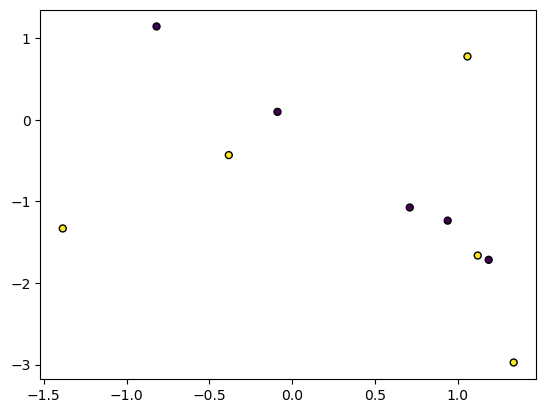

In [73]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

In [74]:
df = pd.DataFrame(np.concatenate([X, y.reshape((-1, 1))], axis=1), columns=['X1', 'X2', 'X3', 'X4', 'y'])
convert_dict = {'X1': np.float32,
                'X2': np.float32,
                'X3': np.float32,
                'X4': np.float32,
                'y': np.int32
                }

df = df.astype(convert_dict)

In [75]:
df

X1        X2        X3        X4  y
0 -1.385140 -1.330470  1.147208 -1.037626  1
1  0.710175 -1.073421  0.606300 -0.502978  0
2  1.186589 -1.715246  1.036410 -0.740102  0
3 -0.818901  1.146553 -0.701759  0.480501  0
4 -0.382621 -0.430965  0.645508 -0.122335  1
5 -0.088643  0.099485 -0.065354  0.033151  0
6  1.120486 -1.662323  0.744544 -0.909938  1
7  0.938960 -1.234616  0.885674 -0.408030  0
8  1.058360  0.778997 -0.465851  0.828744  1
9  1.337498 -2.974306  1.625099 -1.625503  1

In [76]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, y)
y_pred = clf.predict(X)
df['y_pred'] = y_pred

In [77]:
df

X1        X2        X3        X4  y  y_pred
0 -1.385140 -1.330470  1.147208 -1.037626  1       1
1  0.710175 -1.073421  0.606300 -0.502978  0       1
2  1.186589 -1.715246  1.036410 -0.740102  0       1
3 -0.818901  1.146553 -0.701759  0.480501  0       0
4 -0.382621 -0.430965  0.645508 -0.122335  1       1
5 -0.088643  0.099485 -0.065354  0.033151  0       0
6  1.120486 -1.662323  0.744544 -0.909938  1       1
7  0.938960 -1.234616  0.885674 -0.408030  0       1
8  1.058360  0.778997 -0.465851  0.828744  1       0
9  1.337498 -2.974306  1.625099 -1.625503  1       1

In [95]:
print('true positive: ', df.loc[(df.y == 1) & (df.y_pred == 1)].shape[0])
print('false negative: ', df.loc[(df.y == 1) & (df.y_pred == 0)].shape[0])

print('true negative: ', df.loc[(df.y == 0) & (df.y_pred == 0)].shape[0])
print('false positive: ', df.loc[(df.y == 0) & (df.y_pred == 1)].shape[0])

true positive:  4
false negative:  1
true negative:  2
false positive:  3


In [101]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score

In [86]:
tn, fp, fn, tp = confusion_matrix(df.y, df.y_pred).ravel()
print(tn, fp, fn, tp)

2 3 1 4


Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.

In [98]:
# доля объектов, названных классификатором положительными и при этом действительно являющиеся положительными
precision = tp/(tp+fp)
print('precision: ', precision)
precision_score(df.y, df.y_pred)

precision:  0.5714285714285714


0.5714285714285714

In [99]:
# какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм
recall = tp/(tp+fn)
print('recall: ', recall)
recall_score(df.y, df.y_pred)

recall:  0.8


0.8

In [79]:
accuracy_score(df.y, df.y_pred)

0.6

In [81]:
roc_auc_score(df.y, df.y_pred)

0.6000000000000001

In [82]:
# F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.
f1_score(df.y, df.y_pred)

0.6666666666666666

In [96]:
confusion_matrix(df.y, df.y_pred)

array([[2, 3],
       [1, 4]], dtype=int64)

In [104]:
print(classification_report(df.y, df.y_pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.57      0.80      0.67         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10



In [122]:
X, y = make_classification(n_samples=10, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, hypercube=True)

df = pd.DataFrame(np.concatenate([X, y.reshape((-1, 1))], axis=1), columns=['X1', 'X2', 'y'])
convert_dict = {'X1': np.float32,
                'X2': np.float32,
                # 'X3': np.float32,
                # 'X4': np.float32,
                'y': np.int32
                }

df = df.astype(convert_dict)

clf = LogisticRegression(random_state=0).fit(X, y)
y_pred = clf.predict(X)
df['y_pred'] = y_pred

df

X1        X2  y  y_pred
0  1.056500 -1.002387  1       1
1 -0.928738  0.141510  0       0
2 -1.111907 -0.029626  0       0
3 -1.178234  0.279989  0       0
4  1.564160 -1.618683  0       1
5 -0.821423 -2.525565  0       0
6  2.507382 -2.622807  1       1
7  0.290093 -0.157077  1       0
8  0.389494 -0.490842  1       0
9 -0.895686  0.121173  0       0

In [123]:
print(classification_report(df.y, df.y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.67      0.50      0.57         4

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10

